In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
data = pd.read_csv(r"/home/mitraa/Jupyter Notebook/MLP/P1/Car Price Prediction/Vehicle dataset/car data.csv")

In [6]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# checking the distribution of categorical data
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [12]:
# encoding "Fuel_Type" column
data.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# encoding "Seller_Type" column
data.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)

# encoding "Transmission" column
data.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Spiliting the data and target

In [15]:
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = data['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Spiliting Training and Test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model Training

1. Linear Regression

In [17]:
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluate

In [19]:
training_data_prediction = lin_reg_model.predict(X_train)

In [21]:
# R Squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error:" , error_score)

R squared error: 0.8799451660493701


Visualize the actual prices and predicted prices

Text(0.5, 1.0, 'actual prices vs predicted prices')

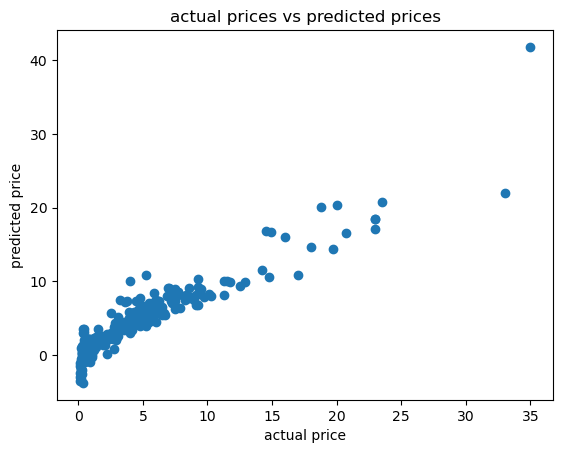

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [23]:
test_data_prediction = lin_reg_model.predict(X_test)

In [24]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:" , error_score)

R squared error: 0.836576671502693


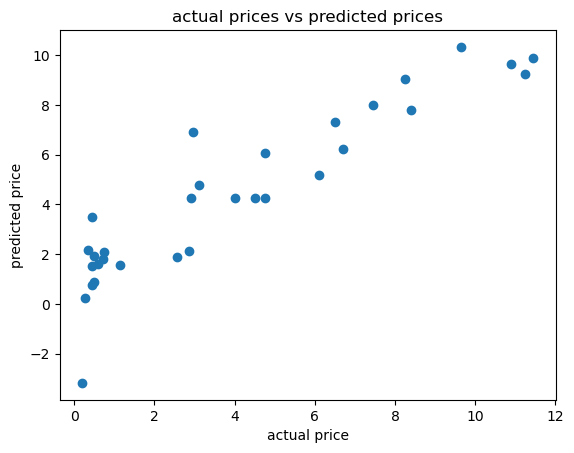

In [25]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

2. Lasso regression

In [30]:
las_reg_model = Lasso()

In [31]:
las_reg_model.fit(X_train,Y_train)

Lasso()

In [32]:
training_data_prediction = las_reg_model.predict(X_train)

In [33]:
# R Squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error:" , error_score)

R squared error: 0.8427856123435794


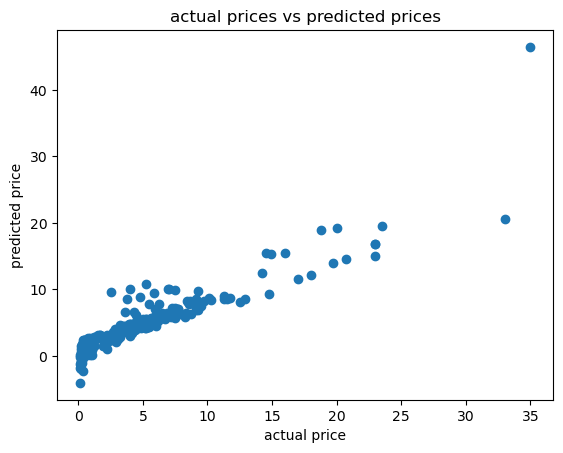

In [34]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [36]:
test_data_prediction = las_reg_model.predict(X_test)

In [37]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:" , error_score)

R squared error: 0.8709167941173195


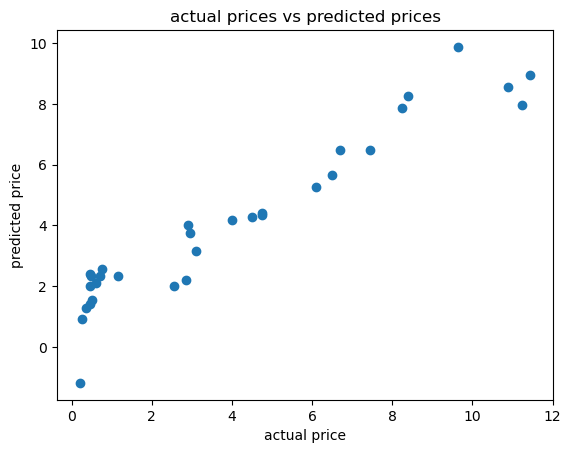

In [38]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()